<a id='Q0'></a>
<center><a target="_blank" href="https://learning.constructor.org/"><img src="https://drive.google.com/uc?id=1wxkbM60NlBlkbGK1JqUypKL24RrTiiYk" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Low Code ML with PyCaret (Live coding) </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Learning, 2023</center>


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Low Code ML with PyCaret (Live coding)

## Install Dependencies

In [33]:
!pip install --pre pycaret
!pip install "schemdraw<0.16" #<-- To handle dependency issues

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

In [3]:
# Run this for more advanced tuning strategies 
# check documentation: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.ClassificationExperiment.tune_model
#!pip install pycaret[tuners]

In [34]:
# for some model interpretation functions
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.8 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=33d8c204bad734db2b1310f637123ad570db988ae4dac8172c3

## Load Dependencies and Data

In [35]:
from pycaret.utils import version
version()

'3.0.2'

In [39]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve


In [7]:
X = pd.read_csv('/content/drive/MyDrive/features_train.csv')
Y=pd.read_csv('/content/drive/MyDrive/target_train.csv')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 121 entries, Id to 119
dtypes: float64(120), int64(1)
memory usage: 9.2 MB


In [8]:
X = pd.read_csv('/content/drive/MyDrive/features_train.csv')
Y=pd.read_csv('/content/drive/MyDrive/target_train.csv')
data=pd.merge(X, Y, on='Id')
ss = StandardScaler()
data.set_index('Id')
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [9]:
X.describe()

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
count,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,...,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,2886.89568,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,...,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,0.00000,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,...,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,2499.75000,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,...,0.510389,0.252094,0.241741,0.511563,-0.677989,-6.804569,-6.904905,0.504073,0.260493,0.513686
50%,4999.50000,4.602140e-01,0.995946,6.109321e+00,0.994325,4.558152e-01,4.490724e-01,0.351341,0.998968,0.081728,...,0.990977,0.496045,0.488491,0.999822,-0.006377,-0.109698,0.155250,1.002604,0.503294,1.003636
75%,7499.25000,1.295762e+00,1.943914,1.758705e+01,1.933788,1.339252e+00,1.336866e+00,21.714889,1.982386,6.818884,...,1.944777,0.744041,0.747421,1.988738,0.669345,6.765366,6.820834,1.932612,0.748390,1.941041
max,9999.00000,1.601254e+01,72.033830,2.681004e+02,33.933547,1.684319e+01,1.812245e+01,118.399310,37.265489,38.392229,...,36.698799,0.999973,0.999895,26.936000,3.737129,36.371289,34.679957,44.943499,0.999985,45.467996


## Basic Data Processing

In [10]:
X.isna().sum()

Id     0
0      0
1      0
2      0
3      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 121, dtype: int64

## Basic EDA

In [11]:
Y["Expected"].value_counts()

2    3365
0    3341
1    3294
Name: Expected, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [13]:
def f1_macro_unweighted(y_true, y_pred):
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='macro', labels=get_config('target_labels'))

In [14]:
data=pd.merge(X, Y, on='Id')


In [15]:
data.set_index('Id')

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Expected
Id,,,,,,,,,,,,,,,,,,,,,
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436,0
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,...,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541,0
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087,2
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436,1
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.039133,1.932955,30.527258,1.895394,1.460542,0.192537,32.700597,0.492404,-12.989238,2.891657,...,0.813626,0.591380,0.450031,2.068493,1.602963,0.167108,0.134495,0.892673,3.217339,0
9996,0.000060,0.161456,0.645531,1.651073,3.671002,0.051387,-19.142738,0.733723,-15.606911,0.315542,...,0.792759,0.091530,1.726438,1.238569,-2.790124,-0.720931,0.639697,0.272982,1.503869,2
9997,4.348522,0.496327,2.274211,0.872857,0.306053,0.546092,26.789277,2.595019,-7.808649,1.892135,...,0.060087,0.700386,0.611112,-0.732795,-6.374433,0.548602,4.716338,0.422413,1.251670,2


In [ ]:
data=pd.merge(X, Y, on='Id')
data.set_index('Id')

In [16]:
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']

(10000, 122)

In [17]:
data=pd.merge(X, Y, on='Id')
data.set_index('Id')
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index=X_train.index)

In [18]:
X.shape,y.shape

((10000, 120), (10000,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape


((8000, 120), (2000, 120), (8000,))

In [20]:
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
9254,-0.480876,-0.227650,-0.703085,-0.230137,-0.668711,-0.633236,0.645538,-0.446789,0.063217,1.414948,...,-0.551419,-0.688968,-1.088756,1.010512,1.262416,1.030152,0.185005,-0.385262,-0.428364,-0.564577
1561,4.758062,1.015038,-0.221298,-0.079093,0.445601,0.656889,0.595875,0.113987,-2.050702,-0.617491,...,-0.437436,0.951166,-1.568023,-0.315878,0.452611,0.738047,-0.646688,0.042478,-0.986306,-0.528058
1670,-0.700309,-0.569854,-0.702745,2.594132,-0.175868,0.513269,1.138030,-0.267010,-1.473089,-0.444377,...,-0.708780,1.730124,0.279688,-0.544413,-0.934239,-0.937081,0.919835,0.441094,-0.744880,-0.239269
6087,-0.072188,-0.292160,4.182333,0.084357,-0.259968,-0.035796,1.590208,0.359741,2.069925,-0.400961,...,-0.533914,1.230713,-1.103897,-0.455126,0.078426,0.027524,-1.589609,0.714163,-0.636593,-0.497913
6669,-0.215475,-0.450130,-0.596347,0.248993,-0.659484,-0.173710,-1.515460,-0.527249,-1.537743,1.024288,...,-0.319707,0.440439,0.969453,1.706465,1.603279,-1.959769,0.314656,0.653801,0.201035,-0.073017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.635115,1.205686,1.018540,0.855207,-0.520765,-0.099898,-0.194126,-0.561298,-1.231671,0.297950,...,0.418494,0.995395,-0.172366,1.671689,0.717928,-2.482523,1.812877,-0.391770,-1.112056,-0.700693
5191,0.691630,-0.300224,1.322422,-0.532768,-0.703412,-0.624331,-1.679078,-0.197679,-1.045410,-0.379182,...,-0.725100,-0.417939,-0.749871,2.205860,0.986611,-1.158515,0.899620,-0.374817,-0.970316,-0.192193
5390,-0.660945,-0.295290,-0.712654,-0.328034,-0.515826,-0.258267,-1.715840,-0.610457,0.966595,-0.319554,...,-0.620527,0.463723,0.435716,-0.388610,0.413420,-0.372711,0.364593,-0.066386,1.607215,-0.322633
860,1.082932,-0.475087,1.731983,2.655837,-0.679077,1.139050,1.908654,1.058417,-1.520981,-0.668890,...,-0.552468,0.182006,-1.493916,1.237326,-0.619224,0.537165,-0.202535,-0.674857,0.479145,-0.297419


In [21]:
pd.concat([X_train_scaled, y_train],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Expected
9254,-0.480876,-0.227650,-0.703085,-0.230137,-0.668711,-0.633236,0.645538,-0.446789,0.063217,1.414948,...,-0.688968,-1.088756,1.010512,1.262416,1.030152,0.185005,-0.385262,-0.428364,-0.564577,1
1561,4.758062,1.015038,-0.221298,-0.079093,0.445601,0.656889,0.595875,0.113987,-2.050702,-0.617491,...,0.951166,-1.568023,-0.315878,0.452611,0.738047,-0.646688,0.042478,-0.986306,-0.528058,2
1670,-0.700309,-0.569854,-0.702745,2.594132,-0.175868,0.513269,1.138030,-0.267010,-1.473089,-0.444377,...,1.730124,0.279688,-0.544413,-0.934239,-0.937081,0.919835,0.441094,-0.744880,-0.239269,2
6087,-0.072188,-0.292160,4.182333,0.084357,-0.259968,-0.035796,1.590208,0.359741,2.069925,-0.400961,...,1.230713,-1.103897,-0.455126,0.078426,0.027524,-1.589609,0.714163,-0.636593,-0.497913,1
6669,-0.215475,-0.450130,-0.596347,0.248993,-0.659484,-0.173710,-1.515460,-0.527249,-1.537743,1.024288,...,0.440439,0.969453,1.706465,1.603279,-1.959769,0.314656,0.653801,0.201035,-0.073017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.635115,1.205686,1.018540,0.855207,-0.520765,-0.099898,-0.194126,-0.561298,-1.231671,0.297950,...,0.995395,-0.172366,1.671689,0.717928,-2.482523,1.812877,-0.391770,-1.112056,-0.700693,1
5191,0.691630,-0.300224,1.322422,-0.532768,-0.703412,-0.624331,-1.679078,-0.197679,-1.045410,-0.379182,...,-0.417939,-0.749871,2.205860,0.986611,-1.158515,0.899620,-0.374817,-0.970316,-0.192193,0
5390,-0.660945,-0.295290,-0.712654,-0.328034,-0.515826,-0.258267,-1.715840,-0.610457,0.966595,-0.319554,...,0.463723,0.435716,-0.388610,0.413420,-0.372711,0.364593,-0.066386,1.607215,-0.322633,1
860,1.082932,-0.475087,1.731983,2.655837,-0.679077,1.139050,1.908654,1.058417,-1.520981,-0.668890,...,0.182006,-1.493916,1.237326,-0.619224,0.537165,-0.202535,-0.674857,0.479145,-0.297419,1


In [31]:
X = pd.read_csv('/content/drive/MyDrive/features_train.csv')
Y=pd.read_csv('/content/drive/MyDrive/target_train.csv')
data=pd.merge(X, Y, on='Id')
ss = StandardScaler()
data.set_index('Id')
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from pycaret.classification import *
#X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
clf = setup(data=pd.concat([X_train_scaled, y_train],axis=1), 
            target = 'Expected', 
            session_id=13, 
            feature_selection=True,
            transformation=True,
            normalize=True,
            remove_outliers=True,
            experiment_name='swiss1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Expected
2,Target type,Multiclass
3,Original data shape,"(8000, 121)"
4,Transformed data shape,"(7720, 25)"
5,Transformed train set shape,"(5320, 25)"
6,Transformed test set shape,"(2400, 25)"
7,Numeric features,120
8,Preprocess,True
9,Imputation type,simple


In [37]:
best_model = compare_models(fold=5, sort='f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6438,0.8228,0.6438,0.6452,0.6438,0.4657,0.4662,0.3060
lightgbm,Light Gradient Boosting Machine,0.6164,0.7922,0.6164,0.6164,0.6162,0.4247,0.4248,1.2800
rf,Random Forest Classifier,0.6050,0.7820,0.6050,0.6054,0.6047,0.4075,0.4079,1.2880
xgboost,Extreme Gradient Boosting,0.6009,0.7882,0.6009,0.6007,0.6007,0.4013,0.4014,4.5480
et,Extra Trees Classifier,0.5793,0.7655,0.5793,0.5800,0.5783,0.3691,0.3699,0.9480
gbc,Gradient Boosting Classifier,0.5523,0.7395,0.5523,0.5535,0.5513,0.3287,0.3296,7.0180
knn,K Neighbors Classifier,0.5212,0.6995,0.5212,0.5298,0.5162,0.2824,0.2876,0.3620
lda,Linear Discriminant Analysis,0.4838,0.6659,0.4838,0.4831,0.4827,0.2257,0.2261,0.3440
nb,Naive Bayes,0.4839,0.6737,0.4839,0.4842,0.4820,0.2262,0.2271,0.2940
ridge,Ridge Classifier,0.4839,0.0000,0.4839,0.4831,0.4818,0.2261,0.2269,0.2860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
clf = GradientBoostingClassifier(random_state=0)

[3.19970526e-03 3.34229949e-03 8.31133622e-03 2.84941384e-03
 3.55464841e-03 1.13220480e-03 4.71675807e-02 1.93406311e-03
 1.09816331e-03 1.81606491e-03 1.63129028e-03 7.85671479e-02
 1.83158057e-03 4.87562025e-03 3.02595449e-03 8.59686655e-04
 2.51759055e-03 4.70578189e-04 9.47892379e-04 5.33584592e-05
 5.17364319e-02 2.59160614e-03 6.47709402e-04 1.19637868e-03
 8.73205872e-02 2.31630296e-03 2.36386848e-03 1.86988739e-03
 4.56526605e-03 1.94541015e-03 5.20377610e-04 0.00000000e+00
 3.95384015e-04 2.72550409e-03 1.52942032e-02 1.05851246e-03
 7.74138811e-04 4.68645063e-02 9.20419586e-04 4.56190757e-03
 8.83836447e-04 1.45224875e-03 4.24907849e-02 1.68534577e-03
 2.48864382e-03 2.44180120e-03 1.89047405e-03 4.54687178e-04
 1.71674585e-03 1.42477688e-03 6.26191692e-02 1.60593297e-03
 5.86978258e-04 1.00519004e-02 1.16762977e-03 8.16005029e-04
 1.53060046e-03 1.77148796e-03 1.06684041e-03 2.14755065e-03
 4.76972301e-02 3.98187824e-02 3.38394501e-02 5.93343785e-03
 3.03641562e-03 1.846355

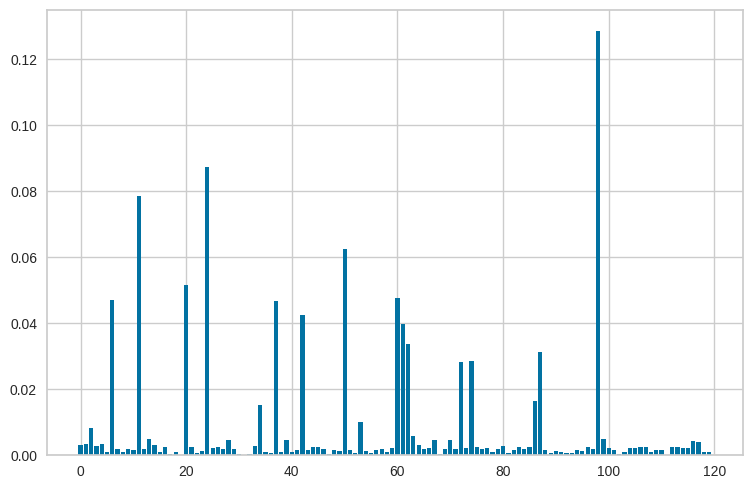

In [26]:
from matplotlib import pyplot
clf.fit(X_train_scaled, y_train)
# feature importance
print(clf.feature_importances_)
# plot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [27]:
from sklearn.feature_selection import SelectFromModel
# select features using threshold
selection = SelectFromModel(clf, threshold=0.00, prefit=True)
select_X_train = selection.transform(X_train_scaled)
X_test_scaled=ss.transform(X_test)
# eval model
select_X_test = selection.transform(X_test_scaled)


In [28]:
X_test=ss.transform(X_test)

In [29]:
select_X_test.shape

(2000, 120)

In [30]:
clf = GradientBoostingClassifier(random_state=0)
random_search  = {'max_features': ['log2', 'sqrt'],
              'learning_rate': [0.01,0.1],
              'n_estimators':[50, 100],
              'max_depth': [5, 10, 20]
               # advanced settings to control the tree depth (complexity)
              #'min_samples_split': [10, 20, 30],
              #'min_samples_leaf': [5, 10, 15]
             }

# Run the grid search
grid_obj = RandomizedSearchCV(estimator=clf, param_distributions=random_search, cv=5, scoring='f1_macro',n_iter=10, verbose=2, random_state=42, n_jobs=-1)
grid_obj = grid_obj.fit(select_X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_



NameError: ignored

In [ ]:
grid_obj.best_estimator_

In [ ]:
pd.set_option('display.max_colwidth', None)

cv_result_df = pd.DataFrame({
    'Model Rank': grid_obj.cv_results_['rank_test_score'],
    'Model Hyperparams': grid_obj.cv_results_['params'],
    'Avg CV F1-Score': grid_obj.cv_results_['mean_test_score'],
    'Std Dev CV F1-Score': grid_obj.cv_results_['std_test_score'],
    'CV Fold 1 F1-Score': grid_obj.cv_results_['split0_test_score'],
    'CV Fold 2 F1-Score': grid_obj.cv_results_['split1_test_score'],
    'CV Fold 3 F1-Score': grid_obj.cv_results_['split2_test_score'],
    'CV Fold 4 F1-Score': grid_obj.cv_results_['split3_test_score'],
    'CV Fold 5 F1-Score': grid_obj.cv_results_['split4_test_score'],
})


cv_result_df.sort_values(by=['Model Rank'], ascending=True)

In [174]:
clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='log_loss', max_depth=30,
                           max_features=1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf.fit(select_X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='log_loss', max_depth=30,
                           max_features=1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [173]:
predictionforest = clf.predict(select_X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[422 110 158]
 [103 427 103]
 [145 118 414]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       690
           1       0.65      0.67      0.66       633
           2       0.61      0.61      0.61       677

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



In [166]:
features_test = pd.read_csv('/content/drive/MyDrive/features_test.csv')
features_test.set_index('Id')
features_test

,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,...,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,...,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,...,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,...,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,...,2.218101,0.228779,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1.741515,0.134820,7.248496,1.042125,0.000725,0.027404,-26.098770,0.522976,11.508938,...,1.032681,0.117975,0.527086,0.910612,-0.013523,-17.638597,8.928354,2.404990,0.443886,1.707916
19996,19996,1.358898,0.221614,8.012158,3.175524,0.552219,0.223238,-15.627277,2.255131,6.387290,...,0.881214,0.913261,0.591320,0.516800,0.770858,-5.014199,-9.313518,1.043028,0.230945,0.462449
19997,19997,0.000939,1.227475,48.685046,1.419278,2.873372,0.784268,-32.856775,0.661216,15.567761,...,0.652379,0.070280,0.419313,1.644102,-0.628569,-0.407432,0.777995,0.803730,0.557201,2.501288
19998,19998,0.127647,4.263982,22.509525,0.383584,0.205385,0.630785,29.201405,3.111156,-8.013544,...,1.940163,0.720134,0.068648,0.258238,0.769108,-4.154734,-11.241676,5.395268,0.765356,0.650460


In [167]:
features_test_new=features_test.drop(columns=['Id'], axis=1)
features_test_scaled=ss.transform(features_test_new)
# eval model
select_features_test_scaled = selection.transform(features_test_scaled)

In [168]:
select_features_test_scaled

array([[-0.76499991, -1.49351762,  0.3871455 , ...,  0.35632026,
        -0.25732556,  0.49100771],
       [-1.51910987,  0.30880491, -3.01163222, ...,  0.2463892 ,
         0.619495  , -1.60549862],
       [ 2.06385336, -0.49579553, -2.03381365, ...,  0.34455282,
        -0.59062489, -0.53072662],
       ...,
       [-1.04829057, -1.82983943, -0.79331661, ...,  0.49480023,
         0.01273814, -1.0526865 ],
       [ 0.91038265,  0.38667034, -0.23857118, ...,  0.8036156 ,
        -0.50350478,  1.57021667],
       [ 0.93879053,  1.5816626 ,  1.44018228, ...,  0.99456096,
        -0.45982547, -1.41626   ]])

In [169]:
predictionforest = clf.predict(select_features_test_scaled)
predictionforest

array([2, 0, 0, ..., 2, 2, 1])

In [170]:
df = pd.DataFrame(predictionforest, columns = ['Predicted'], index = features_test.index)
df=df.reset_index().rename(columns={'index': 'Id'})
df

,Id,Predicted
0,0,2
1,1,0
2,2,0
3,3,2
4,4,1
...,...,...
19995,19995,0
19996,19996,0
19997,19997,2
19998,19998,2


In [171]:
df.to_csv('out.csv', index=False)

In [175]:
pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metrics':'softmax',
    'num_leaves': 10,
    'num_class': 3
} 

In [66]:
import lightgbm as lgb

In [190]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train_scaled, y_train)
lgb_eval = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metrics':'softmax',
    'num_leaves': 10,
    'num_class': 3
} 
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

In [196]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30600
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 120
[LightGBM] [Info] Start training from score -1.104505
[LightGBM] [Info] Start training from score -1.100740
[LightGBM] [Info] Start training from score -1.090644
[1]	valid_0's multi_logloss: 1.0847
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.074
[3]	valid_0's multi_logloss: 1.06416
[4]	valid_0's multi_logloss: 1.0547
[5]	valid_0's multi_logloss: 1.04777
[6]	valid_0's multi_logloss: 1.0399
[7]	valid_0's multi_logloss: 1.03319
[8]	valid_0's 

In [7]:
X = pd.read_csv('/content/drive/MyDrive/features_train.csv')
Y=pd.read_csv('/content/drive/MyDrive/target_train.csv')

In [8]:
data=pd.merge(X, Y, on='Id')
data.set_index('Id')


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,Expected
Id,,,,,,,,,,,,,,,,,,,,,
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,...,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436,0
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,...,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541,0
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,...,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087,2
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,...,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436,1
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,...,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.039133,1.932955,30.527258,1.895394,1.460542,0.192537,32.700597,0.492404,-12.989238,2.891657,...,0.813626,0.591380,0.450031,2.068493,1.602963,0.167108,0.134495,0.892673,3.217339,0
9996,0.000060,0.161456,0.645531,1.651073,3.671002,0.051387,-19.142738,0.733723,-15.606911,0.315542,...,0.792759,0.091530,1.726438,1.238569,-2.790124,-0.720931,0.639697,0.272982,1.503869,2
9997,4.348522,0.496327,2.274211,0.872857,0.306053,0.546092,26.789277,2.595019,-7.808649,1.892135,...,0.060087,0.700386,0.611112,-0.732795,-6.374433,0.548602,4.716338,0.422413,1.251670,2


In [112]:
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_test_scaled=pd.DataFrame(ss.transform(X_test), columns = X_test.columns, index=X_test.index)

In [12]:
X = data.drop(columns=['Expected','Id'], axis=1)
y = data['Expected']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = pd.DataFrame(pt.fit_transform(X_train), columns = X_train.columns, index=X_train.index)
X_test_scaled=pd.DataFrame(pt.transform(X_test), columns = X_test.columns, index=X_test.index)

In [13]:
from sklearn.ensemble import IsolationForest

In [16]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=42)

model.fit(X_train_scaled)

print(model.get_params())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [17]:
X_train_scaled['scores'] = model.decision_function(X_train_scaled)

X_train_scaled['anomaly_score'] = model.predict(X_train_scaled)

In [18]:
X_train_scaled[X_train_scaled['anomaly_score']==-1]

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,scores,anomaly_score
4355,-0.948405,-1.610532,0.556233,-0.088908,-0.951305,-0.501282,-0.632909,-0.595799,0.484588,-1.481033,...,-1.650231,0.750423,0.792434,0.011849,-1.238887,-0.021982,0.642463,-1.674511,-0.009046,-1
2816,1.061772,2.031712,0.938564,-1.186918,0.578128,-1.231170,0.324283,-1.493922,-2.038645,2.317745,...,-0.192600,0.855305,-0.760521,0.943431,-1.217937,-1.092409,-1.017786,1.036985,-0.015376,-1
2129,-0.634543,1.654880,0.888706,-0.272188,0.325816,1.125820,0.202132,0.755033,0.147170,0.937231,...,0.780245,0.583301,0.991922,0.532048,-1.036435,0.456538,-1.665892,-0.808138,-0.005777,-1
5363,0.674400,0.634401,2.067083,1.496303,0.502885,-0.676633,-0.366359,-1.046162,0.951565,1.600389,...,-1.138886,2.393779,-1.730308,1.463819,0.604659,-1.174980,1.075264,-1.374899,-0.001083,-1
811,-1.326353,-0.119006,-0.142145,-0.242405,1.401866,0.814959,0.706402,1.717093,0.471984,-1.418862,...,-0.967385,-0.014352,1.131860,0.295568,0.258969,1.148892,-0.858048,1.006518,-0.000793,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,-0.515259,1.087252,0.049450,1.043836,-0.077993,1.312474,-0.878019,-0.434999,-1.083379,1.572650,...,1.459947,-0.742367,0.423946,1.427217,-0.010872,-1.276726,-1.235592,-0.694865,-0.013610,-1
5463,-0.069162,0.769905,0.936192,0.911459,1.771389,0.909851,0.442596,-0.484487,-1.227106,0.280014,...,1.019262,1.482639,-0.774684,-0.183391,0.114682,2.165618,1.593971,-0.463080,-0.004548,-1
7555,0.333929,-1.414498,-1.378655,-0.639622,0.299027,-0.410786,-1.967115,0.245945,1.060141,-0.028408,...,-0.189154,-1.194026,0.030986,1.441284,-0.361199,-1.402223,0.993747,0.398725,-0.002953,-1
2558,1.522754,1.204821,-1.560912,1.203056,0.754117,-1.173721,-1.738136,-0.259004,-2.281716,-0.177180,...,1.409554,0.015265,2.161625,0.684701,-0.952137,1.147112,-0.438168,-0.475320,-0.001428,-1


In [19]:
X_train_scaled[X_train_scaled['anomaly_score']==1].drop(columns=['anomaly_score','scores'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
9254,-0.377457,0.109041,-1.450101,0.154955,-1.078878,-0.966338,0.650826,-0.412427,0.061942,1.639406,...,-0.931629,-0.672164,-1.094732,1.396683,1.262206,1.028955,0.180477,-0.282577,-0.413238,-0.965329
1561,1.963144,1.485751,0.326416,0.434167,1.038293,1.193852,0.602254,0.714944,-2.047686,-1.393731,...,-0.460146,0.952029,-1.631798,-0.037897,0.452848,0.739295,-0.648561,0.607168,-0.984123,-0.795583
1670,-1.318600,-1.206218,-1.445515,1.891280,0.339014,1.102970,1.131321,0.076710,-1.471670,-0.529225,...,-1.905716,1.678813,0.314317,-0.726721,-0.934229,-0.937578,0.920127,1.053967,-0.735565,0.123394
6087,0.515346,-0.062631,1.999618,0.671557,0.184558,0.566565,1.571122,0.977060,2.072989,-0.369904,...,-0.849610,1.215717,-1.111300,-0.417482,0.078741,0.032566,-1.583134,1.262259,-0.624851,-0.667630
6669,0.276066,-0.607901,-0.617122,0.862944,-1.034891,0.351404,-1.533838,-0.702237,-1.536154,1.473943,...,-0.092396,0.461235,0.970116,1.670668,1.602797,-1.970566,0.310710,1.220961,0.216899,0.453239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.979493,1.574159,1.244234,1.328370,-0.485023,0.472541,-0.180104,-0.843292,-1.230863,0.954079,...,1.055601,0.993973,-0.133590,1.659783,0.718054,-2.499400,1.821797,-0.302390,-1.114569,-1.793077
5191,1.216807,-0.085815,1.362692,-0.708778,-1.254725,-0.925072,-1.702381,0.224184,-1.045046,-0.296146,...,-2.040280,-0.393442,-0.730126,1.804983,0.986588,-1.161012,0.899743,-0.251351,-0.967585,0.226920
5390,-1.106318,-0.071582,-1.591027,-0.069115,-0.468640,0.192275,-1.740266,-1.070826,0.966777,-0.112310,...,-1.299552,0.483878,0.465435,-0.223048,0.413669,-0.369028,0.360914,0.437459,1.580768,-0.084770
860,1.402138,-0.715999,1.496701,1.902652,-1.129640,1.420256,1.880287,1.435672,-1.519436,-1.756807,...,-0.936672,0.208085,-1.546964,1.501048,-0.619051,0.539882,-0.206994,-1.559208,0.491158,-0.018095


In [20]:
import lightgbm as lgb
X_train_new=X_train_scaled[X_train_scaled['anomaly_score']==1].drop(columns=['anomaly_score','scores'], axis=1)
idx=X_train_scaled[X_train_scaled['anomaly_score']==1].index
lgb_train = lgb.Dataset(X_train_new, y_train[idx])
lgb_eval = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metrics':'softmax',
    'num_leaves': 10,
    'num_class': 3
} 
#model = lgb.train(params,                 train_set=lgb_train,                 valid_sets=lgb_eval,                 early_stopping_rounds=30)
model1=lgb.LGBMClassifier(boosting_type= 'gbdt',objective='multiclass',metrics='softmax',num_class=3)
model1.fit(X_train_new, y_train[idx])

LGBMClassifier(metrics='softmax', num_class=3, objective='multiclass')

In [21]:
feature_imp = pd.DataFrame({'Value':model1.feature_importances_,'Feature':X_train_new.columns}).sort_values(by="Value",ascending=False)

cols=feature_imp[feature_imp["Value"]>=70]["Feature"].values
cols

array(['24', '98', '37', '6', '60', '11', '20', '42', '61', '72', '74',
       '50', '62', '86', '87', '34', '2', '53', '63', '70', '64', '83',
       '103', '0', '27', '33'], dtype=object)

In [215]:
from numpy import argmax 
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model1.predict(X_test_scaled)

#y_pred = argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59       690
           1       0.60      0.63      0.61       633
           2       0.57      0.54      0.55       677

    accuracy                           0.58      2000
   macro avg       0.58      0.59      0.58      2000
weighted avg       0.58      0.58      0.58      2000

[[407 115 168]
 [128 397 108]
 [163 149 365]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

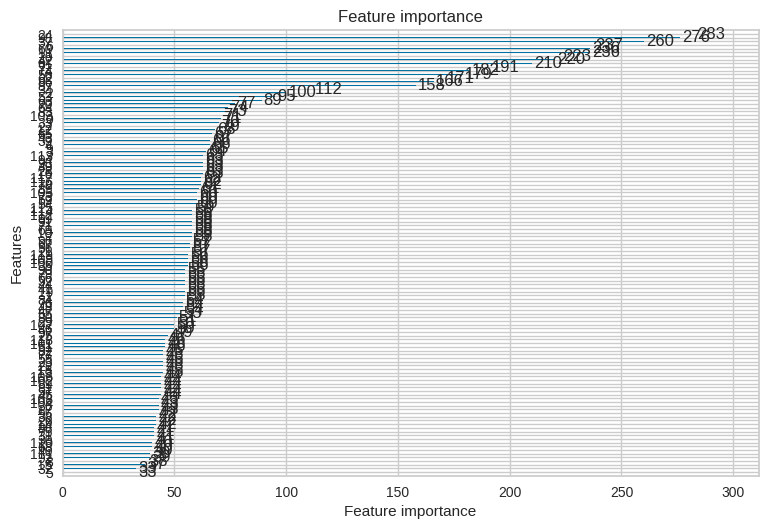

In [216]:
lgb.plot_importance(model1)

In [22]:
select_X_train = X_train_new[cols]
select_X_test = X_test_scaled[cols]
select_X_train

,24,98,37,6,60,11,20,42,61,72,...,2,53,63,70,64,83,103,0,27,33
9254,-1.860287,-2.494503,-1.241130,0.650826,-0.252363,-1.711410,-0.822679,0.066192,1.725528,1.095637,...,-1.450101,1.157087,-0.526332,-1.399469,0.494147,0.417586,1.367213,-0.377457,-0.044381,-0.256280
1561,0.196485,-0.454376,-1.552483,0.602254,1.579054,1.162591,0.313475,-0.410963,1.085611,1.509159,...,0.326416,-0.223743,-0.097954,1.110808,1.831046,0.254248,0.166365,1.963144,1.450106,-1.655987
1670,-1.199901,-1.445800,0.623578,1.131321,1.171785,0.744434,-0.183258,-0.356615,0.124260,-0.849708,...,-1.445515,-1.338988,-0.889840,1.522170,0.026928,-0.556581,-1.192742,-1.318600,1.068547,-1.067855
6087,0.093871,1.741064,-1.222118,1.571122,0.371725,-0.065804,-0.760116,-0.367039,-1.091069,-1.557912,...,1.999618,1.330949,2.026742,-0.116929,-0.676123,-0.092333,-0.050078,0.515346,1.049060,1.728500
6669,0.442951,2.130107,-1.242297,-1.533838,-0.961840,-2.803264,0.373727,0.692043,1.450482,0.465968,...,-0.617122,-0.680632,2.066903,1.222462,0.672277,0.987846,-0.760411,0.276066,-1.281756,1.132432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2.021903,-1.697007,0.908996,-0.180104,-0.067039,-0.820141,0.568894,-0.496878,1.696368,-0.568298,...,1.244234,-1.501917,-1.041374,-1.220504,1.771152,1.010848,1.133604,-0.979493,1.490861,-0.250517
5191,0.405660,0.210434,1.021730,-1.702381,-0.604681,0.607217,0.232647,0.651448,-0.900583,-0.855572,...,1.362692,0.599847,-0.394152,-1.362865,-0.974470,-0.413120,0.788882,1.216807,-0.309777,-0.144479
5390,-1.805847,0.218986,-0.896649,-1.740266,-0.596473,1.115050,0.462801,0.380212,1.725528,-0.436732,...,-1.591027,1.222110,0.235072,0.274114,-0.712958,2.176169,-1.652818,-1.106318,0.210567,-0.328267
860,0.080518,1.340443,-1.749413,1.880287,0.098058,0.036355,-1.306196,-0.319431,0.595393,-0.580385,...,1.496701,-0.422099,-0.046774,-0.849040,0.180995,0.907382,0.421563,1.402138,1.602839,0.473431


In [218]:
model1=lgb.LGBMClassifier(boosting_type= 'gbdt',objective='multiclass',metrics='softmax',num_class=3)
model1.fit(select_X_train, y_train[idx])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metrics='softmax', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_class=3,
               num_leaves=31, objective='multiclass', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [219]:
from numpy import argmax 
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model1.predict(select_X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       690
           1       0.64      0.66      0.65       633
           2       0.61      0.60      0.60       677

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

[[426 102 162]
 [119 415  99]
 [146 127 404]]


In [220]:
param_test ={'num_leaves': [10,20,50], 
             'boosting_type' : ['gbdt','dart'],
             'learning_rate': [0.01,0.1],
             'colsample_bytree' : [0.5,0.7],
             'subsample' : [0.5,0.7],
             'min_split_gain' : [0.01],             
             'max_depth' : [4, 5,6],
             #'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             #'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
             }
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


model1=lgb.LGBMClassifier(objective='multiclass',metrics='softmax',num_class=3)
gs = GridSearchCV(model1, param_test, 
    #n_iter=100,
    scoring='f1_macro',
    cv=5,
    refit=True,
    
    verbose=True)
gs.fit(select_X_train, y_train[idx])

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      metrics='softmax', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_class=3, num_leaves=31,
                                      objective='multiclass', random_state=None,
                                      r...
                                      silent='warn', subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             n_jobs=None,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [4, 5, 6],
                         'min_split_gain': [0.01], 'num_leaves': [10, 20, 50],
                         'subsample': [0.5, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=True)

In [221]:
best_model=gs.best_estimator_

In [222]:
best_model.fit(select_X_train, y_train[idx])


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
               importance_type='split', learning_rate=0.1, max_depth=6,
               metrics='softmax', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.01, n_estimators=100, n_jobs=-1, num_class=3,
               num_leaves=50, objective='multiclass', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=0.5,
               subsample_for_bin=200000, subsample_freq=0)

In [223]:
y_pred_train = best_model.predict(select_X_train)
print(classification_report(y_train[idx], y_pred_train))
print(confusion_matrix(y_train[idx], y_pred_train))
y_pred = best_model.predict(select_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2495
           1       0.93      0.93      0.93      2503
           2       0.95      0.92      0.93      2522

    accuracy                           0.93      7520
   macro avg       0.93      0.93      0.93      7520
weighted avg       0.93      0.93      0.93      7520

[[2341   89   65]
 [ 103 2333   67]
 [ 121   88 2313]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       690
           1       0.64      0.64      0.64       633
           2       0.61      0.61      0.61       677

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

[[424 106 160]
 [129 402 102]
 [146 121 410]]


In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.qda import QDA
estimator_3 = QDA()
parameters_3 = {
    'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1), 
                   }
# with GridSearch
grid_search_qda = GridSearchCV(
    estimator=estimator_3,
    param_grid=parameters_3,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

grid_search_qda.fit(select_X_train, y_train[idx])


GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': (1e-05, 0.0001, 0.001, 0.01, 0.1),
                         'store_covariance': (True, False),
                         'tol': (0.0001, 0.001, 0.01, 0.1)},
             scoring='accuracy')

In [38]:
best_model=grid_search_qda.best_estimator_
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.01,
                              store_covariance=True, tol=0.0001)

In [28]:
best_model.fit(select_X_train, y_train[idx])
y_pred_train = best_model.predict(select_X_train)
print(classification_report(y_train[idx], y_pred_train))
print(confusion_matrix(y_train[idx], y_pred_train))
y_pred = best_model.predict(select_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      2495
           1       0.72      0.73      0.72      2503
           2       0.69      0.67      0.68      2522

    accuracy                           0.69      7520
   macro avg       0.69      0.69      0.69      7520
weighted avg       0.69      0.69      0.69      7520

[[1712  363  420]
 [ 338 1824  341]
 [ 488  353 1681]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       690
           1       0.66      0.71      0.69       633
           2       0.64      0.61      0.63       677

    accuracy                           0.65      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.65      0.65      0.65      2000

[[442 106 142]
 [ 96 450  87]
 [139 122 416]]
